In [2]:
import numpy as np
import pandas as pd
import matplotlib as plt
from sklearn.preprocessing import StandardScaler
from utils import *
# 3D visuals
import plotly.graph_objects as go
import plotly.express as px  # For color palettes
from sklearn.decomposition import PCA


### <b> Dataset Creation </b>

* Goal: Create a dataset based on lettuce plants' biometry and environmental variables for a greenhouse experiment

#### <b> Biometry variables </b>

* <b> Diameter </b>: The diameter of a chosen leaf of the plant, expressed in centimeters (cm)
* <b> Perpendicular </b>: The length of perpendicular line to the chosen diameter of a chosen leaf, expressed in centimeters (cm)
* <b> Weight </b>: The weight of the plant, expressed in kilograms (Kg)
* <b> Height </b>: The height of the plant, expressed in centimeters (cm)
* <b> Thickness </b>: Leaf thickness, expressed in centimeters (cm)
* <b> Number of leaves (N leaves) </b>: The number of leaves the plant presents 

#### <b> Environmental variables </b>

* <b> Irrigation </b>
* <b> Humidity </b>
* <b> Temperature </b>
* <b> PAR radiation </b>


### <b> Biometry </b>

In [3]:
# Previously created biometry dataset
biometry = pd.read_csv("data/final_biometric_data.csv")
biometry.rename(columns={"Unnamed: 0":"Date", "Sample":"Sample?", "CODE":"Sample"}, inplace=True)
biometry.drop(columns=['Max. Temp.', 'Min. Temp.', 'Mean. Temp.',
       'Max. Hum.', 'Min. Hum.', 'Mean. Hum.', 'Combined Temperature Average',
       'Combined Temperature Std Dev', 'Combined Humidity Average',
       'Combined Humidity Std Dev','Sample?','BBCH'], inplace=True)

In [4]:
bbch = pd.read_excel('raw_data/biom_to_BBCH.xlsx')
bbch.drop(columns={'Number', 'Line', 'Sample'}, inplace=True)

In [5]:
bbch_cols = list(bbch.columns)

In [6]:
new_bbch = transform_bbch_data(bbch)

In [7]:
new_bbch.rename(columns={'CODE':'Sample'}, inplace=True)

In [8]:
new_bbch

,Sample,Date,BBCH
0,RNGRA1,2024-09-07,19
1,RNGRA1,2024-09-11,19
2,RNGRA1,2024-09-14,19
3,RNGRA1,2024-09-17,37
4,RNGRA1,2024-09-20,37
...,...,...,...
355,RWGRC5,2024-09-17,19
356,RWGRC5,2024-09-20,19
357,RWGRC5,2024-09-24,19
358,RWGRC5,2024-09-29,19


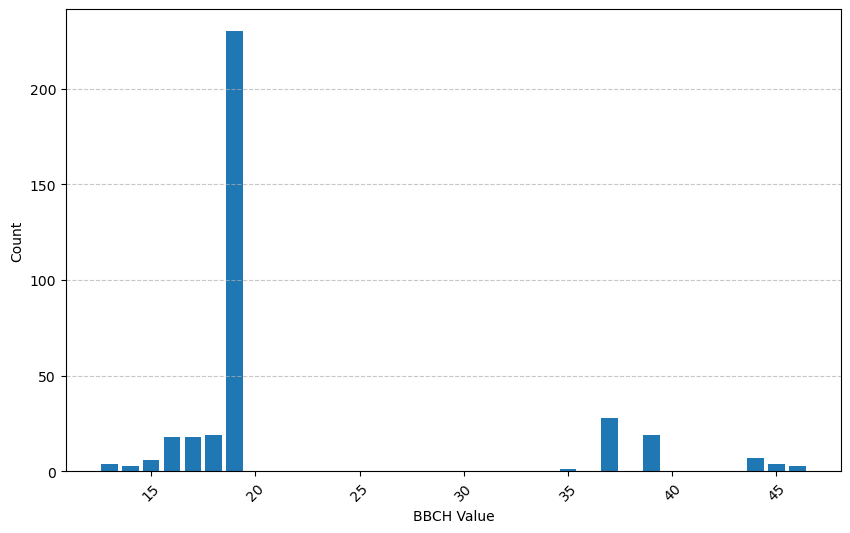

In [139]:
# Count occurrences of each BBCH value
bbch_counts = new_bbch["BBCH"].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(bbch_counts.index, bbch_counts.values)

plt.xlabel("BBCH Value")
plt.ylabel("Count")
plt.xticks(rotation=45)  
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

In [9]:
new_bbch.describe()

,Date,BBCH
count,360,360.000000
mean,2024-09-19 08:59:59.999999744,22.022222
min,2024-09-07 00:00:00,13.000000
25%,2024-09-13 06:00:00,19.000000
50%,2024-09-18 12:00:00,19.000000
75%,2024-09-25 06:00:00,19.000000
max,2024-10-03 00:00:00,46.000000
std,NaN,8.086204


In [10]:
# Set Date column to datetime type
biometry['Date'] = pd.to_datetime(biometry['Date'])

In [11]:
biometry

,Date,Number,Line,Sample,No leaves,Diameter,Perpendicular,Height,Average Leaf Thickness
0,2024-09-07,1,1,RWGRB5,10,14.5,10.4,9.50,0.0000
1,2024-09-07,2,1,RWGRA3,10,10.9,9.7,9.80,0.0000
2,2024-09-07,3,1,RWGRC1,13,15.8,13.9,9.40,0.0000
3,2024-09-07,4,1,RWGRA2,10,12.1,7.2,9.50,0.0000
4,2024-09-07,5,1,RWGRB3,11,14.2,10.5,12.50,0.0000
...,...,...,...,...,...,...,...,...,...
355,2024-10-03,41,6,RNROA3,11,26.8,24.5,10.15,0.3250
356,2024-10-03,42,6,RNROB5,7,30.1,22.6,11.85,0.3200
357,2024-10-03,43,6,RNROA2,11,22.8,20.5,10.35,0.3650
358,2024-10-03,44,6,RNROC4,10,30.5,26.2,11.55,0.3500


In [12]:
biometry.describe()

,Date,Number,Line,No leaves,Diameter,Perpendicular,Height,Average Leaf Thickness
count,360,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000
mean,2024-09-19 08:59:59.999999744,23.000000,3.533333,11.258333,20.455833,18.001111,10.554583,0.156412
min,2024-09-07 00:00:00,1.000000,1.000000,3.000000,6.200000,4.300000,5.050000,0.000000
25%,2024-09-13 06:00:00,12.000000,2.000000,9.000000,16.175000,13.725000,9.337500,0.000000
50%,2024-09-18 12:00:00,23.000000,4.000000,11.000000,20.700000,18.200000,10.550000,0.000000
75%,2024-09-25 06:00:00,34.000000,5.000000,14.000000,24.100000,21.800000,12.050000,0.310000
max,2024-10-03 00:00:00,45.000000,6.000000,19.000000,34.500000,33.400000,15.800000,0.453333
std,NaN,13.005249,1.748537,3.161826,5.698440,5.742700,1.992213,0.163414


In [13]:
rwgr = biometry[biometry['Sample'].str.contains('RWGR')]

In [14]:
rwgr['Sample'].nunique()

15

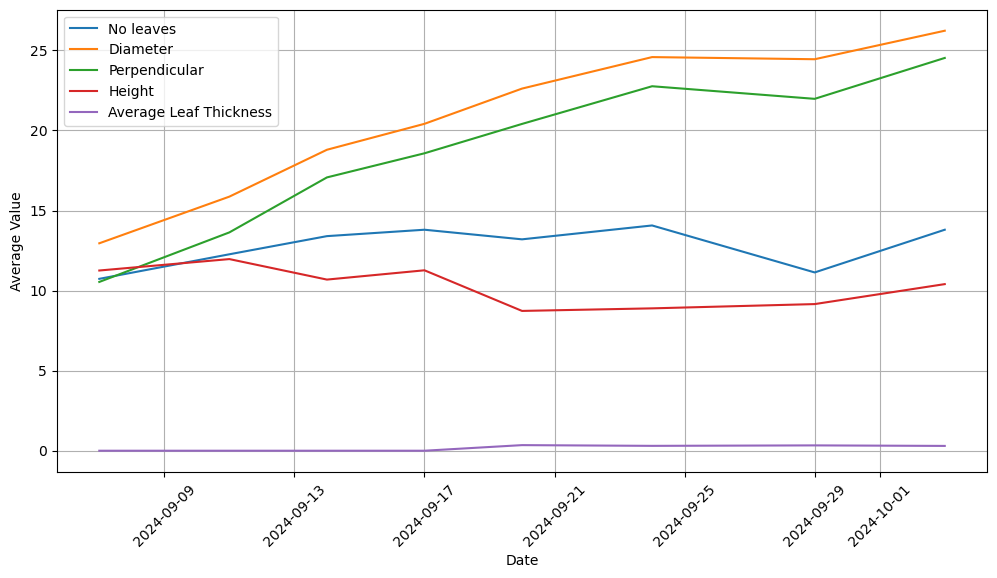

In [15]:
# Group by date and compute the mean for each numeric column
rwgr_avg = (rwgr.drop(columns={'Line','Number'})).groupby("Date").mean(numeric_only=True)

plt.figure(figsize=(12, 6))
for column in rwgr_avg.columns:
    plt.plot(rwgr_avg.index, rwgr_avg[column], label=column)

plt.xlabel("Date")
plt.ylabel("Average Value")
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [16]:
rwgr_avg.describe()

,No leaves,Diameter,Perpendicular,Height,Average Leaf Thickness
count,8.000000,8.000000,8.000000,8.000000,8.000000
mean,12.800000,20.736667,18.685000,10.294167,0.160822
std,1.279385,4.634892,4.765948,1.227145,0.172623
min,10.733333,12.953333,10.540000,8.730000,0.000000
25%,11.983333,18.061667,16.208333,9.090000,0.000000
50%,13.300000,21.513333,19.490000,10.545000,0.150067
75%,13.800000,24.480000,22.170000,11.256667,0.311222
max,14.066667,26.226667,24.526667,11.966667,0.349556


In [17]:
rngr = biometry[biometry['Sample'].str.contains('RNGR')]
rngr['Sample'].nunique()

15

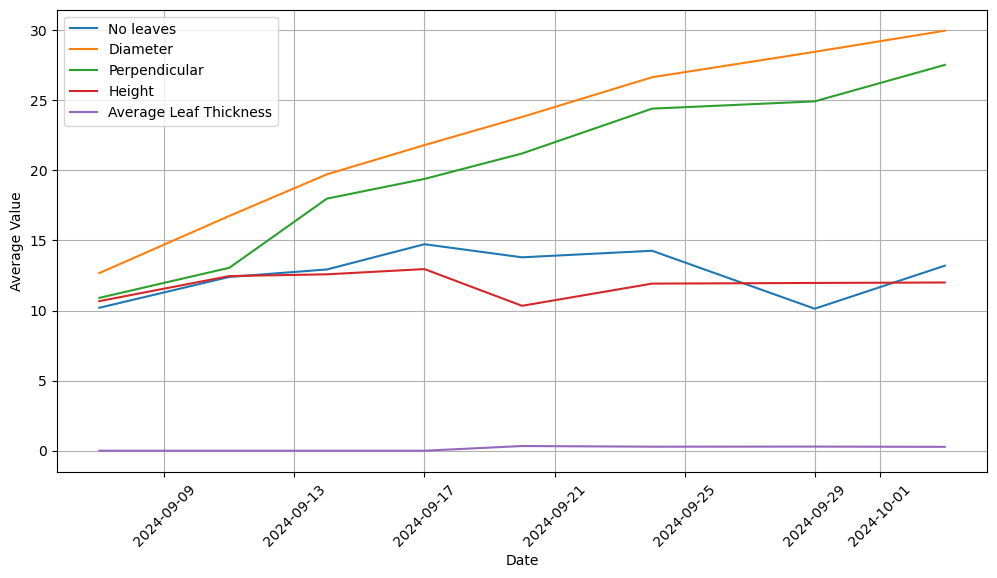

In [18]:
# Group by date and compute the mean for each numeric column
rngr_avg = (rngr.drop(columns={'Line','Number'})).groupby("Date").mean(numeric_only=True)

plt.figure(figsize=(12, 6))
for column in rngr_avg.columns:
    plt.plot(rngr_avg.index, rngr_avg[column], label=column)


plt.xlabel("Date")
plt.ylabel("Average Value")
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [19]:
rngr_avg.describe()

,No leaves,Diameter,Perpendicular,Height,Average Leaf Thickness
count,8.000000,8.000000,8.000000,8.000000,8.000000
mean,12.708333,22.480000,19.925833,11.864583,0.149308
std,1.733310,5.952021,5.820161,0.914417,0.160470
min,10.133333,12.673333,10.906667,10.340000,0.000000
25%,11.850000,18.978333,16.753333,11.610833,0.000000
50%,13.066667,22.810000,20.300000,11.986667,0.138233
75%,13.916667,27.100000,24.536667,12.491667,0.289944
max,14.733333,29.966667,27.526667,12.960000,0.334667


In [20]:
rnro = biometry[biometry['Sample'].str.contains('RNRO')]

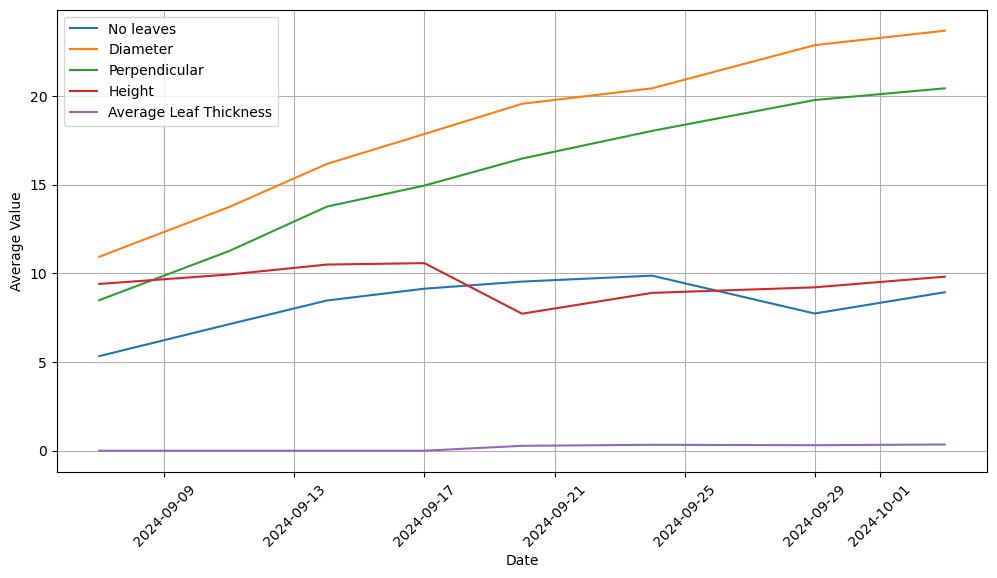

In [21]:
# Group by date and compute the mean for each numeric column
rnro_avg = (rnro.drop(columns={'Line','Number'})).groupby("Date").mean(numeric_only=True)

plt.figure(figsize=(12, 6))
for column in rnro_avg.columns:
    plt.plot(rnro_avg.index, rnro_avg[column], label=column)

plt.xlabel("Date")
plt.ylabel("Average Value")
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [22]:
rnro_avg.describe()

,No leaves,Diameter,Perpendicular,Height,Average Leaf Thickness
count,8.000000,8.000000,8.000000,8.000000,8.000000
mean,8.266667,18.150833,15.392500,9.505000,0.159104
std,1.491564,4.397952,4.143855,0.928677,0.171392
min,5.333333,10.933333,8.486667,7.723333,0.000000
25%,7.583333,15.560000,13.135000,9.131667,0.000000
50%,8.700000,18.703333,15.706667,9.605000,0.138222
75%,9.233333,21.035000,18.461667,10.073333,0.317056
max,9.866667,23.673333,20.426667,10.573333,0.350833


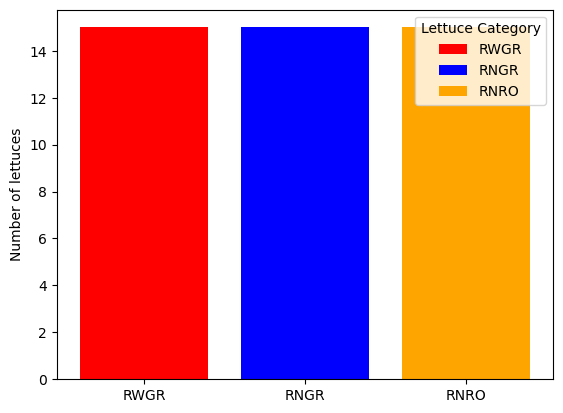

In [23]:
# Number of lettuces per category
fig, ax = plt.subplots()

plants = ['RWGR','RNGR', 'RNRO']
counts = [rwgr['Sample'].nunique(), rngr['Sample'].nunique(), rnro['Sample'].nunique()]
color_labels = ['red', 'blue', 'orange']

ax.bar(plants, counts, label=plants, color=color_labels)

ax.set_ylabel('Number of lettuces')
ax.legend(title='Lettuce Category')

plt.show()

In [24]:
rnro['Sample'].nunique()

15

In [25]:
biometry['Sample'].unique()

array(['RWGRB5', 'RWGRA3', 'RWGRC1', 'RWGRA2', 'RWGRB3', 'RWGRA4',
       'RWGRC3', 'RWGRA5', 'RWGRC2', 'RWGRB4', 'RWGRC5', 'RWGRB1',
       'RWGRC4', 'RWGRB2', 'RWGRA1', 'RNGRA3', 'RNGRB5', 'RNGRC4',
       'RNGRA1', 'RNGRC5', 'RNGRB2', 'RNGRA2', 'RNROB2', 'RNROC3',
       'RNROA5', 'RNROC5', 'RNROB3', 'RNROA1', 'RNROC1', 'RNGRC1',
       'RNGRB3', 'RNGRA5', 'RNGRB1', 'RNGRC3', 'RNGRB4', 'RNGRA4',
       'RNGRC2', 'RNROB1', 'RNROA4', 'RNROC2', 'RNROA3', 'RNROB5',
       'RNROA2', 'RNROC4', 'RNROB4'], dtype=object)

In [26]:
def plot_plant_biometry(df, plant):    
    plant = df[df['Sample'] == plant]
    plt.figure(figsize=(8, 4))
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.xlabel("Date")
    plt.xticks(rotation=45) 
    plt.plot(plant['Date'], plant['Diameter'], label="Diameter")
    plt.plot(plant['Date'], plant['Perpendicular'], label="Perpendicular")
    plt.plot(plant['Date'], plant['Height'], label="Height")
    plt.plot(plant['Date'], plant['Average Leaf Thickness'], label="Average Leaf Thickness")
    plt.legend()

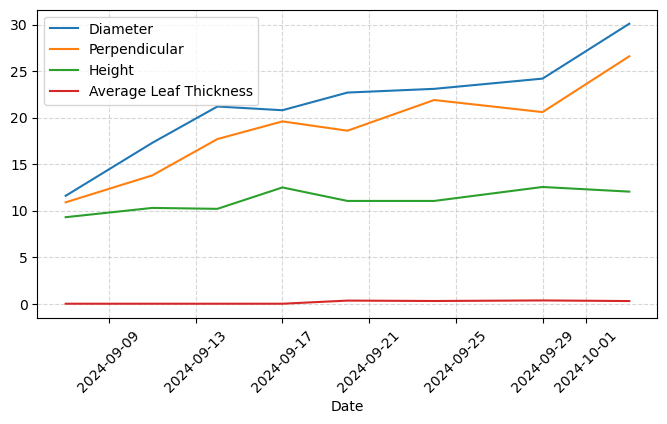

In [27]:
plot_plant_biometry(biometry, 'RNGRA2')

<b> Total number of plants </b>

In [28]:
biometry['Sample'].nunique()

45

* There's 45 plants in this experiment, each represented by its unique code, represented in the CODE column

<b> Dates where biometry was measured </b>

In [29]:
biometry['Date'].nunique()

8

* Measurements of the biometry of the plants were taken at 8 different days

### <b> Irrigation </b>

In [30]:
irrigation = pd.read_excel("raw_data/irrigation.xlsx")

In [31]:
# Set Date column to datetime type
irrigation['Date'] = pd.to_datetime(irrigation['Date'])

In [32]:
irrigation

,Date,Sample,Quantity (mL)
0,2024-08-24,rngra1,50.0
1,2024-08-24,rngra2,50.0
2,2024-08-24,rngra3,50.0
3,2024-08-24,rngra4,50.0
4,2024-08-24,rngra5,50.0
...,...,...,...
985,2024-10-01,rwgrc1,7.5
986,2024-10-01,rwgrc2,14.5
987,2024-10-01,rwgrc3,5.0
988,2024-10-01,rwgrc4,12.0


<b> Number of irrigation days </b>

In [33]:
irrigation['Date'].nunique()

23

* There's 23 days of irrigation

### <b> Temperature </b>

In [34]:
temperature = pd.read_excel("raw_data/inside_2.xlsx")[['date','temperature', 'timestamp']]

In [35]:
temperature

,date,temperature,timestamp
0,2024-08-22,18.200000,1900-01-01 00:58:09
1,2024-08-22,17.200000,1900-01-01 01:58:08
2,2024-08-22,17.300000,1900-01-01 02:58:09
3,2024-08-22,17.700000,1900-01-01 03:58:11
4,2024-08-22,17.400000,1900-01-01 04:58:12
...,...,...,...
941,2024-10-03,20.703388,1900-01-01 11:03:16
942,2024-10-03,21.296177,1900-01-01 12:03:13
943,2024-10-03,21.758629,1900-01-01 13:03:13
944,2024-10-03,21.531219,1900-01-01 14:03:13


In [36]:
from datetime import datetime

# Convert 'date' to datetime (only date part)
temperature['Date'] = pd.to_datetime(temperature['date']).dt.date
temperature['timestamp'] = pd.to_datetime(temperature['timestamp']).dt.time
temperature['datetime'] = temperature.apply(lambda row: datetime.combine(row['date'], row['timestamp']), axis=1)
temperature.drop(columns={'Date'}, inplace=True)
temperature.rename(columns={'date':'Date'}, inplace=True)

In [37]:
temperature.sort_values(by='datetime', inplace=True)

In [38]:
temperature

,Date,temperature,timestamp,datetime
0,2024-08-22,18.200000,00:58:09,2024-08-22 00:58:09
1,2024-08-22,17.200000,01:58:08,2024-08-22 01:58:08
2,2024-08-22,17.300000,02:58:09,2024-08-22 02:58:09
3,2024-08-22,17.700000,03:58:11,2024-08-22 03:58:11
4,2024-08-22,17.400000,04:58:12,2024-08-22 04:58:12
...,...,...,...,...
941,2024-10-03,20.703388,11:03:16,2024-10-03 11:03:16
942,2024-10-03,21.296177,12:03:13,2024-10-03 12:03:13
943,2024-10-03,21.758629,13:03:13,2024-10-03 13:03:13
944,2024-10-03,21.531219,14:03:13,2024-10-03 14:03:13


/var/folders/vw/fb5g0yw578jfpvmgdl2bgkr80000gn/T/ipykernel_832/4130809194.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


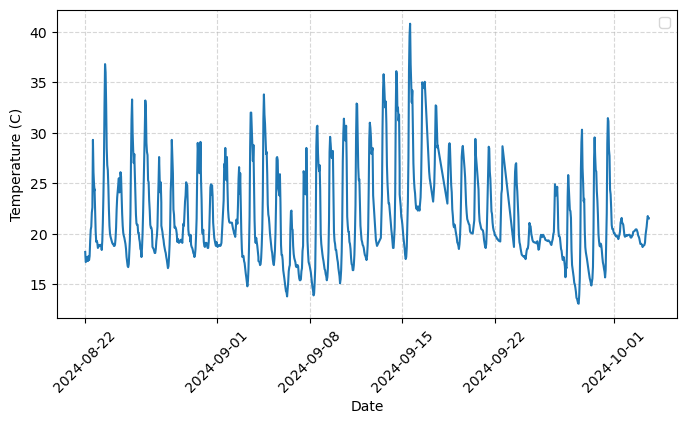

In [39]:
plt.figure(figsize=(8, 4))
plt.grid(True, linestyle='--', alpha=0.5)
plt.xlabel("Date")
plt.ylabel("Temperature (C)")
plt.xticks(rotation=45) 
plt.legend()
plt.plot(temperature['datetime'], temperature['temperature'])

In [40]:
temperature.describe()

,Date,temperature,datetime
count,946,946.000000,946
mean,2024-09-11 05:39:27.019027456,21.531898,2024-09-11 17:29:49.607822592
min,2024-08-22 00:00:00,13.076940,2024-08-22 00:58:09
25%,2024-08-31 00:00:00,18.700000,2024-08-31 19:15:22.249999872
50%,2024-09-10 00:00:00,20.075792,2024-09-10 16:34:52
75%,2024-09-23 00:00:00,24.000000,2024-09-23 12:13:15.750000128
max,2024-10-03 00:00:00,40.800000,2024-10-03 15:03:13
std,NaN,4.569634,NaN


In [41]:
temperature

,Date,temperature,timestamp,datetime
0,2024-08-22,18.200000,00:58:09,2024-08-22 00:58:09
1,2024-08-22,17.200000,01:58:08,2024-08-22 01:58:08
2,2024-08-22,17.300000,02:58:09,2024-08-22 02:58:09
3,2024-08-22,17.700000,03:58:11,2024-08-22 03:58:11
4,2024-08-22,17.400000,04:58:12,2024-08-22 04:58:12
...,...,...,...,...
941,2024-10-03,20.703388,11:03:16,2024-10-03 11:03:16
942,2024-10-03,21.296177,12:03:13,2024-10-03 12:03:13
943,2024-10-03,21.758629,13:03:13,2024-10-03 13:03:13
944,2024-10-03,21.531219,14:03:13,2024-10-03 14:03:13


In [42]:
temperature['Date'].nunique()

43

In [43]:
temperature['Date']

0     2024-08-22
1     2024-08-22
2     2024-08-22
3     2024-08-22
4     2024-08-22
         ...    
941   2024-10-03
942   2024-10-03
943   2024-10-03
944   2024-10-03
945   2024-10-03
Name: Date, Length: 946, dtype: datetime64[ns]

In [44]:
temperature['Date'].unique()

<DatetimeArray>
['2024-08-22 00:00:00', '2024-08-23 00:00:00', '2024-08-24 00:00:00',
 '2024-08-25 00:00:00', '2024-08-26 00:00:00', '2024-08-27 00:00:00',
 '2024-08-28 00:00:00', '2024-08-29 00:00:00', '2024-08-30 00:00:00',
 '2024-08-31 00:00:00', '2024-09-01 00:00:00', '2024-09-02 00:00:00',
 '2024-09-03 00:00:00', '2024-09-04 00:00:00', '2024-09-05 00:00:00',
 '2024-09-06 00:00:00', '2024-09-07 00:00:00', '2024-09-08 00:00:00',
 '2024-09-09 00:00:00', '2024-09-10 00:00:00', '2024-09-11 00:00:00',
 '2024-09-12 00:00:00', '2024-09-13 00:00:00', '2024-09-14 00:00:00',
 '2024-09-15 00:00:00', '2024-09-16 00:00:00', '2024-09-17 00:00:00',
 '2024-09-18 00:00:00', '2024-09-19 00:00:00', '2024-09-20 00:00:00',
 '2024-09-21 00:00:00', '2024-09-22 00:00:00', '2024-09-23 00:00:00',
 '2024-09-24 00:00:00', '2024-09-25 00:00:00', '2024-09-26 00:00:00',
 '2024-09-27 00:00:00', '2024-09-28 00:00:00', '2024-09-29 00:00:00',
 '2024-09-30 00:00:00', '2024-10-01 00:00:00', '2024-10-02 00:00:00',
 '20

* Measurements of the temperature of the greenhouse were taken at 43 different days

In [45]:
# Daily number of temperature measurements
temp_date_dict = count_daily_measurements(temperature)

In [46]:
temp_date_dict

{Timestamp('2024-08-22 00:00:00'): 25,
 Timestamp('2024-08-23 00:00:00'): 24,
 Timestamp('2024-08-24 00:00:00'): 24,
 Timestamp('2024-08-25 00:00:00'): 24,
 Timestamp('2024-08-26 00:00:00'): 24,
 Timestamp('2024-08-27 00:00:00'): 24,
 Timestamp('2024-08-28 00:00:00'): 24,
 Timestamp('2024-08-29 00:00:00'): 24,
 Timestamp('2024-08-30 00:00:00'): 24,
 Timestamp('2024-08-31 00:00:00'): 24,
 Timestamp('2024-09-01 00:00:00'): 23,
 Timestamp('2024-09-02 00:00:00'): 24,
 Timestamp('2024-09-03 00:00:00'): 24,
 Timestamp('2024-09-04 00:00:00'): 24,
 Timestamp('2024-09-05 00:00:00'): 24,
 Timestamp('2024-09-06 00:00:00'): 24,
 Timestamp('2024-09-07 00:00:00'): 24,
 Timestamp('2024-09-08 00:00:00'): 24,
 Timestamp('2024-09-09 00:00:00'): 24,
 Timestamp('2024-09-10 00:00:00'): 24,
 Timestamp('2024-09-11 00:00:00'): 24,
 Timestamp('2024-09-12 00:00:00'): 19,
 Timestamp('2024-09-13 00:00:00'): 18,
 Timestamp('2024-09-14 00:00:00'): 24,
 Timestamp('2024-09-15 00:00:00'): 24,
 Timestamp('2024-09-16 00

In [47]:
temp_date_dict.values()

dict_values([25, 24, 24, 24, 24, 24, 24, 24, 24, 24, 23, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 19, 18, 24, 24, 16, 9, 14, 21, 20, 24, 14, 13, 23, 24, 24, 22, 24, 23, 23, 24, 24, 15])

* As we can tell by the values of the date_dict dictionary the number of temperature measurements wasn't constant during the experiment.

### <b> Humidity </b>

In [48]:
humidity = pd.read_excel("raw_data/inside_2.xlsx")[['date','humidity', 'timestamp']]

# Set Date column to datetime type
humidity['Date'] = pd.to_datetime(humidity['date']).dt.date
humidity['timestamp'] = pd.to_datetime(humidity['timestamp']).dt.time
humidity['datetime'] = humidity.apply(lambda row: datetime.combine(row['date'], row['timestamp']), axis=1)


humidity.sort_values(by='datetime', inplace=True)

humidity.drop(columns={'Date'}, inplace=True)
humidity.rename(columns={'date':'Date'}, inplace=True)

In [49]:
humidity

,Date,humidity,timestamp,datetime
0,2024-08-22,66.100000,00:58:09,2024-08-22 00:58:09
1,2024-08-22,70.700000,01:58:08,2024-08-22 01:58:08
2,2024-08-22,74.000000,02:58:09,2024-08-22 02:58:09
3,2024-08-22,76.600000,03:58:11,2024-08-22 03:58:11
4,2024-08-22,77.800000,04:58:12,2024-08-22 04:58:12
...,...,...,...,...
941,2024-10-03,86.559822,11:03:16,2024-10-03 11:03:16
942,2024-10-03,85.557480,12:03:13,2024-10-03 12:03:13
943,2024-10-03,84.059044,13:03:13,2024-10-03 13:03:13
944,2024-10-03,82.733772,14:03:13,2024-10-03 14:03:13


/var/folders/vw/fb5g0yw578jfpvmgdl2bgkr80000gn/T/ipykernel_832/2745300950.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


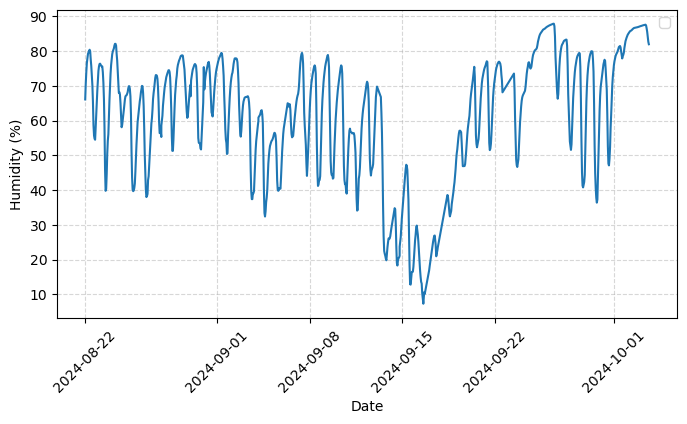

In [50]:
plt.figure(figsize=(8, 4))
plt.grid(True, linestyle='--', alpha=0.5)
plt.xlabel("Date")
plt.ylabel("Humidity (%)")
plt.xticks(rotation=45)
plt.plot(humidity['datetime'], humidity['humidity'])
plt.legend()

In [51]:
humidity['Date'].nunique()

43

In [52]:
humidity.describe()

,Date,humidity,datetime
count,946,946.000000,946
mean,2024-09-11 05:39:27.019027456,62.002261,2024-09-11 17:29:49.607822592
min,2024-08-22 00:00:00,7.300000,2024-08-22 00:58:09
25%,2024-08-31 00:00:00,51.946456,2024-08-31 19:15:22.249999872
50%,2024-09-10 00:00:00,65.900000,2024-09-10 16:34:52
75%,2024-09-23 00:00:00,75.600000,2024-09-23 12:13:15.750000128
max,2024-10-03 00:00:00,87.892677,2024-10-03 15:03:13
std,NaN,17.434100,NaN


In [53]:
humidity

,Date,humidity,timestamp,datetime
0,2024-08-22,66.100000,00:58:09,2024-08-22 00:58:09
1,2024-08-22,70.700000,01:58:08,2024-08-22 01:58:08
2,2024-08-22,74.000000,02:58:09,2024-08-22 02:58:09
3,2024-08-22,76.600000,03:58:11,2024-08-22 03:58:11
4,2024-08-22,77.800000,04:58:12,2024-08-22 04:58:12
...,...,...,...,...
941,2024-10-03,86.559822,11:03:16,2024-10-03 11:03:16
942,2024-10-03,85.557480,12:03:13,2024-10-03 12:03:13
943,2024-10-03,84.059044,13:03:13,2024-10-03 13:03:13
944,2024-10-03,82.733772,14:03:13,2024-10-03 14:03:13


In [54]:
hum_date_dict = count_daily_measurements(humidity)

In [55]:
hum_date_dict.values()

dict_values([25, 24, 24, 24, 24, 24, 24, 24, 24, 24, 23, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 19, 18, 24, 24, 16, 9, 14, 21, 20, 24, 14, 13, 23, 24, 24, 22, 24, 23, 23, 24, 24, 15])

* The number of humidity measurements follows the number of temperature measurements (captured by the same sensors)

### <b> PAR </b>

In [56]:
par = pd.read_excel('raw_data/PAR.xlsx')

# Set Date column to datetime type using clean_timestamp from utils.py
par['Date'] = par['Date'].apply(clean_timestamp)

In [57]:
par

,Date,Timestamp,μmoles
0,2024-09-02,1900-01-01 19:18:39,81.9
1,2024-09-02,1900-01-01 20:18:39,5.1
2,2024-09-02,1900-01-01 21:18:39,0.0
3,2024-09-02,1900-01-01 22:18:39,0.0
4,2024-09-02,1900-01-01 23:18:39,0.0
...,...,...,...
416,2024-09-20,1900-01-01 05:56:51,0.3
417,2024-09-20,1900-01-01 06:56:51,0.3
418,2024-09-20,1900-01-01 07:56:51,1.1
419,2024-09-20,1900-01-01 08:56:51,3.2


In [58]:
# Set Date column to datetime type
par['Date'] = pd.to_datetime(par['Date']).dt.date
par['Timestamp'] = pd.to_datetime(par['Timestamp']).dt.time
par['datetime'] = par.apply(lambda row: datetime.combine(row['Date'], row['Timestamp']), axis=1)

par['Date'] = pd.to_datetime(par['Date'])

In [59]:
par.dtypes

Date         datetime64[ns]
Timestamp            object
μmoles              float64
datetime     datetime64[ns]
dtype: object

In [60]:
par.sort_values(by='datetime', inplace=True)

/var/folders/vw/fb5g0yw578jfpvmgdl2bgkr80000gn/T/ipykernel_832/3216697210.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


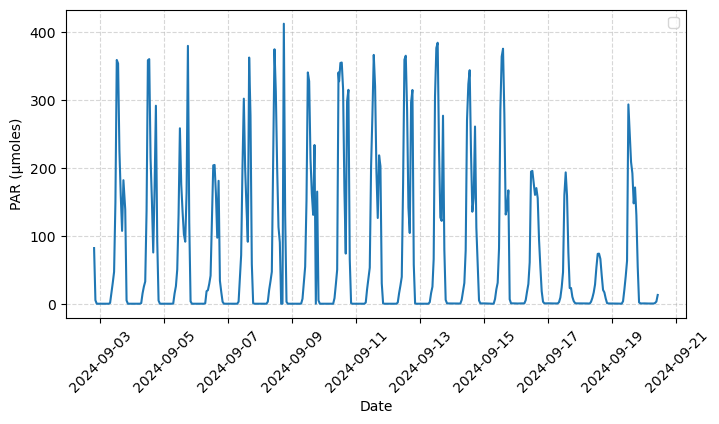

In [61]:
plt.figure(figsize=(8, 4))
plt.grid(True, linestyle='--', alpha=0.5)
plt.xlabel("Date")
plt.ylabel("PAR (μmoles)")
plt.xticks(rotation=45)
plt.plot(par['datetime'], par['μmoles'])
plt.legend()

In [62]:
par

,Date,Timestamp,μmoles,datetime
0,2024-09-02,19:18:39,81.9,2024-09-02 19:18:39
1,2024-09-02,20:18:39,5.1,2024-09-02 20:18:39
2,2024-09-02,21:18:39,0.0,2024-09-02 21:18:39
3,2024-09-02,22:18:39,0.0,2024-09-02 22:18:39
4,2024-09-02,23:18:39,0.0,2024-09-02 23:18:39
...,...,...,...,...
416,2024-09-20,05:56:51,0.3,2024-09-20 05:56:51
417,2024-09-20,06:56:51,0.3,2024-09-20 06:56:51
418,2024-09-20,07:56:51,1.1,2024-09-20 07:56:51
419,2024-09-20,08:56:51,3.2,2024-09-20 08:56:51


In [63]:
par.describe()

,Date,μmoles,datetime
count,421,421.000000,421
mean,2024-09-11 02:27:04.703087872,68.349881,2024-09-11 14:31:08.783847936
min,2024-09-02 00:00:00,0.000000,2024-09-02 19:18:39
25%,2024-09-07 00:00:00,0.000000,2024-09-07 04:39:48
50%,2024-09-11 00:00:00,2.900000,2024-09-11 14:01:18
75%,2024-09-15 00:00:00,112.900000,2024-09-15 23:56:51
max,2024-09-20 00:00:00,412.100000,2024-09-20 09:56:51
std,NaN,107.485871,NaN


In [64]:
par['Date'].nunique()

19

In [65]:
par_date_dict = count_daily_measurements(par)

In [66]:
par_date_dict

{Timestamp('2024-09-02 00:00:00'): 5,
 Timestamp('2024-09-03 00:00:00'): 24,
 Timestamp('2024-09-04 00:00:00'): 24,
 Timestamp('2024-09-05 00:00:00'): 24,
 Timestamp('2024-09-06 00:00:00'): 24,
 Timestamp('2024-09-07 00:00:00'): 23,
 Timestamp('2024-09-08 00:00:00'): 24,
 Timestamp('2024-09-09 00:00:00'): 24,
 Timestamp('2024-09-10 00:00:00'): 24,
 Timestamp('2024-09-11 00:00:00'): 24,
 Timestamp('2024-09-12 00:00:00'): 24,
 Timestamp('2024-09-13 00:00:00'): 25,
 Timestamp('2024-09-14 00:00:00'): 23,
 Timestamp('2024-09-15 00:00:00'): 24,
 Timestamp('2024-09-16 00:00:00'): 23,
 Timestamp('2024-09-17 00:00:00'): 24,
 Timestamp('2024-09-18 00:00:00'): 24,
 Timestamp('2024-09-19 00:00:00'): 24,
 Timestamp('2024-09-20 00:00:00'): 10}

<b> Common Dates amongst biometric and environmental dataframes </b>

In [67]:
dataframes = {'Biometry':biometry, 'Irrigation':irrigation, 'Humidity':humidity,'Temperature':temperature, 'Par':par}

In [68]:
common_dates = find_common_dates(dataframes, check_num = 1)

Biometry x Irrigation | No. Common Dates: 4

Biometry x Humidity | No. Common Dates: 8

Biometry x Temperature | No. Common Dates: 8

Biometry x Par | No. Common Dates: 5

Irrigation x Humidity | No. Common Dates: 23

Irrigation x Temperature | No. Common Dates: 23

Irrigation x Par | No. Common Dates: 11

Humidity x Temperature | No. Common Dates: 43

Humidity x Par | No. Common Dates: 19

Temperature x Par | No. Common Dates: 19



In [69]:
common_dates

{'Biometry x Irrigation': {Timestamp('2024-09-07 00:00:00'),
  Timestamp('2024-09-11 00:00:00'),
  Timestamp('2024-09-17 00:00:00'),
  Timestamp('2024-09-20 00:00:00')},
 'Biometry x Humidity': {Timestamp('2024-09-07 00:00:00'),
  Timestamp('2024-09-11 00:00:00'),
  Timestamp('2024-09-14 00:00:00'),
  Timestamp('2024-09-17 00:00:00'),
  Timestamp('2024-09-20 00:00:00'),
  Timestamp('2024-09-24 00:00:00'),
  Timestamp('2024-09-29 00:00:00'),
  Timestamp('2024-10-03 00:00:00')},
 'Biometry x Temperature': {Timestamp('2024-09-07 00:00:00'),
  Timestamp('2024-09-11 00:00:00'),
  Timestamp('2024-09-14 00:00:00'),
  Timestamp('2024-09-17 00:00:00'),
  Timestamp('2024-09-20 00:00:00'),
  Timestamp('2024-09-24 00:00:00'),
  Timestamp('2024-09-29 00:00:00'),
  Timestamp('2024-10-03 00:00:00')},
 'Biometry x Par': {Timestamp('2024-09-07 00:00:00'),
  Timestamp('2024-09-11 00:00:00'),
  Timestamp('2024-09-14 00:00:00'),
  Timestamp('2024-09-17 00:00:00'),
  Timestamp('2024-09-20 00:00:00')},
 'Ir

* Since there aren't many common dates amongst the biometry dataframes and environmental variables, we'll make use of the available environmental data to calculate cumulative values where possible to gather valuable information and append it to the corresponding biometry entries in the dataframe.

#### <b> Environmental Variables </b>

In [70]:
cumul_gdd = calculate_cumulative_gdd(temperature_df=temperature)

In [71]:
cumul_gdd

,Date,timestamp,datetime,GDD Cumul.
0,2024-08-22,00:58:09,2024-08-22 00:58:09,18.750000
1,2024-08-22,01:58:08,2024-08-22 01:58:08,18.750000
2,2024-08-22,02:58:09,2024-08-22 02:58:09,18.750000
3,2024-08-22,03:58:11,2024-08-22 03:58:11,18.750000
4,2024-08-22,04:58:12,2024-08-22 04:58:12,18.750000
...,...,...,...,...
941,2024-10-03,11:03:16,2024-10-03 11:03:16,809.244245
942,2024-10-03,12:03:13,2024-10-03 12:03:13,809.244245
943,2024-10-03,13:03:13,2024-10-03 13:03:13,809.244245
944,2024-10-03,14:03:13,2024-10-03 14:03:13,809.244245


<b> Accumulated PAR </b>

In [72]:
par_cumul = calculate_cumulative_par(par_df=par)

<b> Accumulated Solution and Nitrate Irrigation </b>

In [73]:
irr_df = calculate_accumulated_nitrates(irrigation_df=irrigation)

In [74]:
irr_df

,Date,Sample,Cumul. Irrigation (mL),Cumul. Nitrates (milimoles)
0,2024-08-24,RNGRA1,50.0,0.3000
1,2024-08-24,RNGRA2,50.0,0.3000
2,2024-08-24,RNGRA3,50.0,0.3000
3,2024-08-24,RNGRA4,50.0,0.3000
4,2024-08-24,RNGRA5,50.0,0.3000
...,...,...,...,...
985,2024-10-01,RWGRC1,1084.0,18.4280
986,2024-10-01,RWGRC2,877.5,14.9175
987,2024-10-01,RWGRC3,1045.5,17.7735
988,2024-10-01,RWGRC4,1058.0,17.9860


<b> Average daily Humidity </b>

In [75]:
hum_avg = daily_average_humidity(humidity_df=humidity)

In [76]:
hum_avg

,Date,timestamp,datetime,Average Humidity %
0,2024-08-22,00:58:09,2024-08-22 00:58:09,69.260000
1,2024-08-22,01:58:08,2024-08-22 01:58:08,69.260000
2,2024-08-22,02:58:09,2024-08-22 02:58:09,69.260000
3,2024-08-22,03:58:11,2024-08-22 03:58:11,69.260000
4,2024-08-22,04:58:12,2024-08-22 04:58:12,69.260000
...,...,...,...,...
941,2024-10-03,11:03:16,2024-10-03 11:03:16,86.349222
942,2024-10-03,12:03:13,2024-10-03 12:03:13,86.349222
943,2024-10-03,13:03:13,2024-10-03 13:03:13,86.349222
944,2024-10-03,14:03:13,2024-10-03 14:03:13,86.349222


In [77]:
biometry.dtypes

Date                      datetime64[ns]
Number                             int64
Line                               int64
Sample                            object
No leaves                          int64
Diameter                         float64
Perpendicular                    float64
Height                           float64
Average Leaf Thickness           float64
dtype: object

In [78]:
cumul_gdd.dtypes

Date          datetime64[ns]
timestamp             object
datetime      datetime64[ns]
GDD Cumul.           float64
dtype: object

In [79]:
par_cumul.dtypes

Date          datetime64[ns]
PAR Cumul.           float64
dtype: object

In [80]:
irr_df.dtypes

Date                           datetime64[ns]
Sample                                 object
Cumul. Irrigation (mL)                float64
Cumul. Nitrates (milimoles)           float64
dtype: object

In [81]:
new_bbch.dtypes

Sample            object
Date      datetime64[ns]
BBCH               int64
dtype: object

<b> Combine all dataframes </b>

In [82]:
merged_df = merge_variables(bbch_df=new_bbch, biometry_df=biometry, gdd_df=cumul_gdd, par_df=par_cumul, nitrates_df=irr_df)

In [83]:
par_cumul

,Date,PAR Cumul.
0,2024-09-02,87.0
1,2024-09-03,1860.3
2,2024-09-04,3788.5
3,2024-09-05,5441.0
4,2024-09-06,6577.0
5,2024-09-07,8284.7
6,2024-09-08,10229.2
7,2024-09-09,12051.7
8,2024-09-10,14750.7
9,2024-09-11,16804.0


In [84]:
merged_df[merged_df['Sample'] == 'RNGRA3']

,Date,Number,Line,Sample,No leaves,Diameter,Perpendicular,Height,Average Leaf Thickness,BBCH,timestamp,datetime,GDD Cumul.,PAR Cumul.,Cumul. Irrigation (mL),Cumul. Nitrates (milimoles)
2,2024-09-07,16,3,RNGRA3,9,9.8,9.7,10.70,0.000000,19,05:03:13,2024-09-07 05:03:13,317.050000,8284.7,350.00,2.1000
47,2024-09-11,16,3,RNGRA3,12,14.3,12.3,12.80,0.000000,19,00:05:04,2024-09-11 00:05:04,391.750000,16804.0,462.25,2.7735
92,2024-09-14,16,3,RNGRA3,12,21.2,13.8,12.50,0.000000,19,11:06:36,2024-09-14 11:06:36,457.100000,22970.1,530.50,3.1830
137,2024-09-17,16,3,RNGRA3,14,21.5,16.8,11.30,0.000000,19,09:51:32,2024-09-17 09:51:32,529.378430,26761.5,661.50,3.9690
182,2024-09-20,16,3,RNGRA3,14,21.5,20.4,11.90,0.416667,19,11:28:04,2024-09-20 11:28:04,589.001102,28775.3,737.50,4.4250
227,2024-09-24,16,3,RNGRA3,14,28.5,25.7,13.55,0.293333,19,05:29:15,2024-09-24 05:29:15,660.469683,28775.3,862.50,5.1750
272,2024-09-29,16,3,RNGRA3,13,27.8,28.5,13.05,0.430000,19,05:49:38,2024-09-29 05:49:38,743.211838,28775.3,997.50,5.9850
317,2024-10-03,16,3,RNGRA3,16,31.4,30.6,11.45,0.264000,19,15:03:13,2024-10-03 15:03:13,809.244245,28775.3,1141.00,6.8460


In [85]:
merged_df.to_csv('03_biometric.csv')

In [86]:
merged_df.columns

Index(['Date', 'Number', 'Line', 'Sample', 'No leaves', 'Diameter',
       'Perpendicular', 'Height', 'Average Leaf Thickness', 'BBCH',
       'timestamp', 'datetime', 'GDD Cumul.', 'PAR Cumul.',
       'Cumul. Irrigation (mL)', 'Cumul. Nitrates (milimoles)'],
      dtype='object')

In [87]:
modified_df = merged_df.copy()

### <b> EDA </b>

array([[<Axes: title={'center': 'Date'}>,
        <Axes: title={'center': 'Number'}>,
        <Axes: title={'center': 'Line'}>,
        <Axes: title={'center': 'No leaves'}>],
       [<Axes: title={'center': 'Diameter'}>,
        <Axes: title={'center': 'Perpendicular'}>,
        <Axes: title={'center': 'Height'}>,
        <Axes: title={'center': 'Average Leaf Thickness'}>],
       [<Axes: title={'center': 'BBCH'}>,
        <Axes: title={'center': 'datetime'}>,
        <Axes: title={'center': 'GDD Cumul.'}>,
        <Axes: title={'center': 'PAR Cumul.'}>],
       [<Axes: title={'center': 'Cumul. Irrigation (mL)'}>,
        <Axes: title={'center': 'Cumul. Nitrates (milimoles)'}>,
        <Axes: >, <Axes: >]], dtype=object)

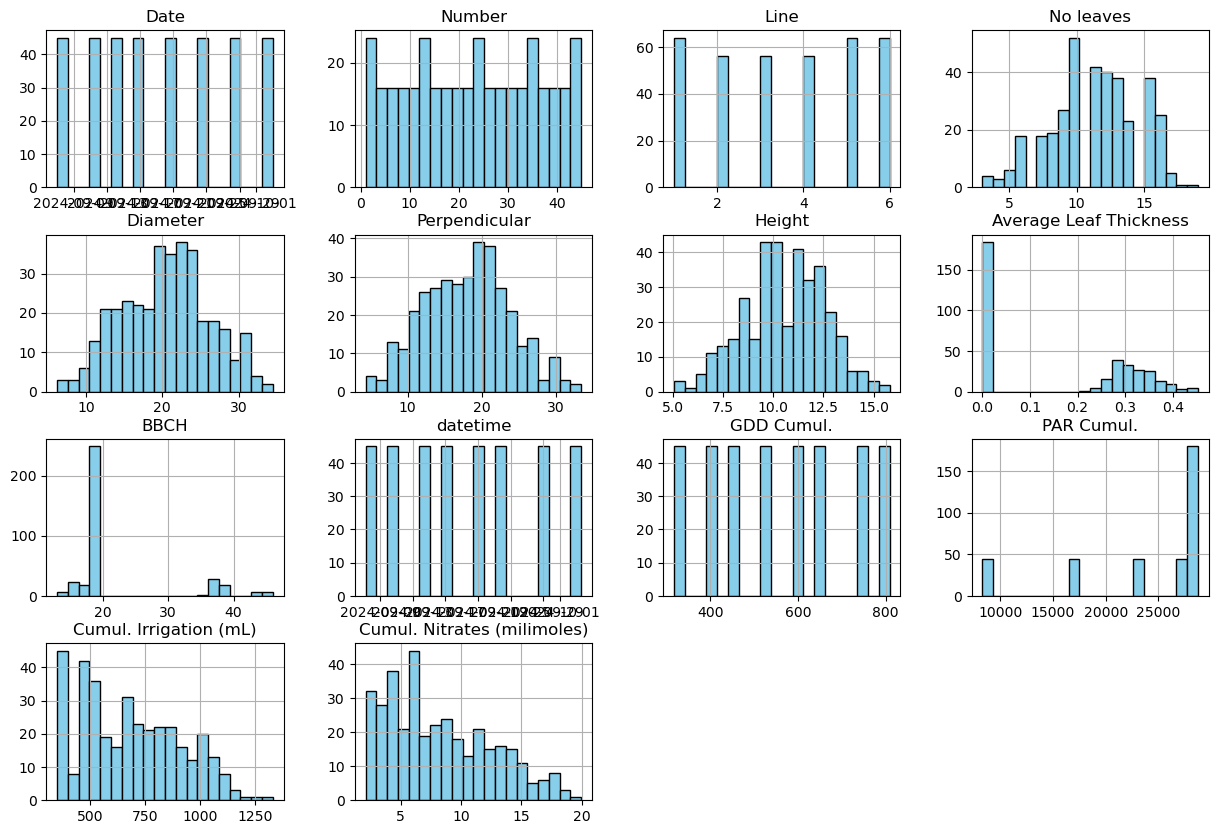

In [88]:
# Plot histograms
merged_df.hist(bins=20, figsize=(15, 10), color='skyblue', edgecolor='black')

In [89]:
merged_df.drop(columns={'Line','Number'}, inplace=True)

# Create a new column "Family Sample" by removing the last character of "Sample" for PCA
merged_df["Family Sample"] = merged_df["Sample"].str[:-2]


In [90]:
merged_df

,Date,Sample,No leaves,Diameter,Perpendicular,Height,Average Leaf Thickness,BBCH,timestamp,datetime,GDD Cumul.,PAR Cumul.,Cumul. Irrigation (mL),Cumul. Nitrates (milimoles),Family Sample
0,2024-09-07,RNGRA1,12,12.9,11.1,11.80,0.0000,19,05:03:13,2024-09-07 05:03:13,317.050000,8284.7,350.0,2.1000,RNGR
1,2024-09-07,RNGRA2,10,11.6,10.9,9.30,0.0000,19,05:03:13,2024-09-07 05:03:13,317.050000,8284.7,350.0,2.1000,RNGR
2,2024-09-07,RNGRA3,9,9.8,9.7,10.70,0.0000,19,05:03:13,2024-09-07 05:03:13,317.050000,8284.7,350.0,2.1000,RNGR
3,2024-09-07,RNGRA4,7,8.9,7.7,6.90,0.0000,17,05:03:13,2024-09-07 05:03:13,317.050000,8284.7,350.0,2.1000,RNGR
4,2024-09-07,RNGRA5,7,10.2,6.8,9.50,0.0000,17,05:03:13,2024-09-07 05:03:13,317.050000,8284.7,350.0,2.1000,RNGR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,2024-10-03,RWGRC1,16,23.6,21.7,8.55,0.3520,39,15:03:13,2024-10-03 15:03:13,809.244245,28775.3,1084.0,18.4280,RWGR
356,2024-10-03,RWGRC2,12,28.6,27.4,13.75,0.3100,44,15:03:13,2024-10-03 15:03:13,809.244245,28775.3,877.5,14.9175,RWGR
357,2024-10-03,RWGRC3,16,23.6,23.8,8.55,0.3350,39,15:03:13,2024-10-03 15:03:13,809.244245,28775.3,1045.5,17.7735,RWGR
358,2024-10-03,RWGRC4,11,27.6,26.8,7.15,0.2975,45,15:03:13,2024-10-03 15:03:13,809.244245,28775.3,1058.0,17.9860,RWGR


In [91]:
merged_df.describe()

,Date,No leaves,Diameter,Perpendicular,Height,Average Leaf Thickness,BBCH,datetime,GDD Cumul.,PAR Cumul.,Cumul. Irrigation (mL),Cumul. Nitrates (milimoles)
count,360,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360,360.000000,360.000000,360.000000,360.000000
mean,2024-09-19 08:59:59.999999744,11.258333,20.455833,18.001111,10.554583,0.156412,22.022222,2024-09-19 16:59:34.375000064,562.150662,23740.187500,680.458333,8.206746
min,2024-09-07 00:00:00,3.000000,6.200000,4.300000,5.050000,0.000000,13.000000,2024-09-07 05:03:13,317.050000,8284.700000,350.000000,2.100000
25%,2024-09-13 06:00:00,9.000000,16.175000,13.725000,9.337500,0.000000,19.000000,2024-09-13 14:21:13,440.762500,21428.575000,477.812500,4.550000
50%,2024-09-18 12:00:00,11.000000,20.700000,18.200000,10.550000,0.000000,19.000000,2024-09-18 22:39:48,559.189766,27768.400000,672.375000,7.229625
75%,2024-09-25 06:00:00,14.000000,24.100000,21.800000,12.050000,0.310000,19.000000,2024-09-25 11:34:20.750000128,681.155222,28775.300000,857.000000,11.528063
max,2024-10-03 00:00:00,19.000000,34.500000,33.400000,15.800000,0.453333,46.000000,2024-10-03 15:03:13,809.244245,28775.300000,1331.000000,19.953750
std,NaN,3.161826,5.698440,5.742700,1.992213,0.163414,8.086204,NaN,160.475317,7064.192611,229.556517,4.332061


In [92]:
merged_df[merged_df['Sample'] == 'RNGRA1']

,Date,Sample,No leaves,Diameter,Perpendicular,Height,Average Leaf Thickness,BBCH,timestamp,datetime,GDD Cumul.,PAR Cumul.,Cumul. Irrigation (mL),Cumul. Nitrates (milimoles),Family Sample
0,2024-09-07,RNGRA1,12,12.9,11.1,11.80,0.000000,19,05:03:13,2024-09-07 05:03:13,317.050000,8284.7,350.00,2.1000,RNGR
45,2024-09-11,RNGRA1,15,14.2,13.2,12.80,0.000000,19,00:05:04,2024-09-11 00:05:04,391.750000,16804.0,466.00,2.7960,RNGR
90,2024-09-14,RNGRA1,13,17.5,15.6,11.80,0.000000,19,11:06:36,2024-09-14 11:06:36,457.100000,22970.1,540.25,3.2415,RNGR
135,2024-09-17,RNGRA1,16,20.3,17.3,13.20,0.000000,37,09:51:32,2024-09-17 09:51:32,529.378430,26761.5,676.75,4.0605,RNGR
180,2024-09-20,RNGRA1,11,23.1,22.8,9.35,0.356667,37,11:28:04,2024-09-20 11:28:04,589.001102,28775.3,732.75,4.3965,RNGR
225,2024-09-24,RNGRA1,13,29.5,26.1,10.65,0.306667,39,05:29:15,2024-09-24 05:29:15,660.469683,28775.3,863.75,5.1825,RNGR
270,2024-09-29,RNGRA1,10,25.2,29.1,14.35,0.000000,39,05:49:38,2024-09-29 05:49:38,743.211838,28775.3,1000.00,6.0000,RNGR
315,2024-10-03,RNGRA1,15,29.1,20.6,11.25,0.265000,44,15:03:13,2024-10-03 15:03:13,809.244245,28775.3,1172.25,7.0335,RNGR


In [93]:
merged_df.describe()

,Date,No leaves,Diameter,Perpendicular,Height,Average Leaf Thickness,BBCH,datetime,GDD Cumul.,PAR Cumul.,Cumul. Irrigation (mL),Cumul. Nitrates (milimoles)
count,360,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360,360.000000,360.000000,360.000000,360.000000
mean,2024-09-19 08:59:59.999999744,11.258333,20.455833,18.001111,10.554583,0.156412,22.022222,2024-09-19 16:59:34.375000064,562.150662,23740.187500,680.458333,8.206746
min,2024-09-07 00:00:00,3.000000,6.200000,4.300000,5.050000,0.000000,13.000000,2024-09-07 05:03:13,317.050000,8284.700000,350.000000,2.100000
25%,2024-09-13 06:00:00,9.000000,16.175000,13.725000,9.337500,0.000000,19.000000,2024-09-13 14:21:13,440.762500,21428.575000,477.812500,4.550000
50%,2024-09-18 12:00:00,11.000000,20.700000,18.200000,10.550000,0.000000,19.000000,2024-09-18 22:39:48,559.189766,27768.400000,672.375000,7.229625
75%,2024-09-25 06:00:00,14.000000,24.100000,21.800000,12.050000,0.310000,19.000000,2024-09-25 11:34:20.750000128,681.155222,28775.300000,857.000000,11.528063
max,2024-10-03 00:00:00,19.000000,34.500000,33.400000,15.800000,0.453333,46.000000,2024-10-03 15:03:13,809.244245,28775.300000,1331.000000,19.953750
std,NaN,3.161826,5.698440,5.742700,1.992213,0.163414,8.086204,NaN,160.475317,7064.192611,229.556517,4.332061


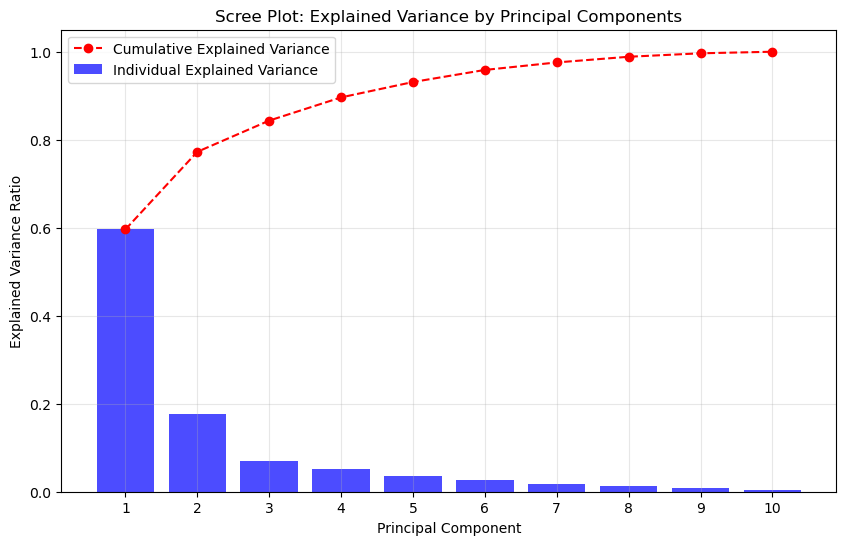

In [94]:
expl_variance = explained_variance_visualizer(merged_df)

#### <b> PCA - 2D </b>

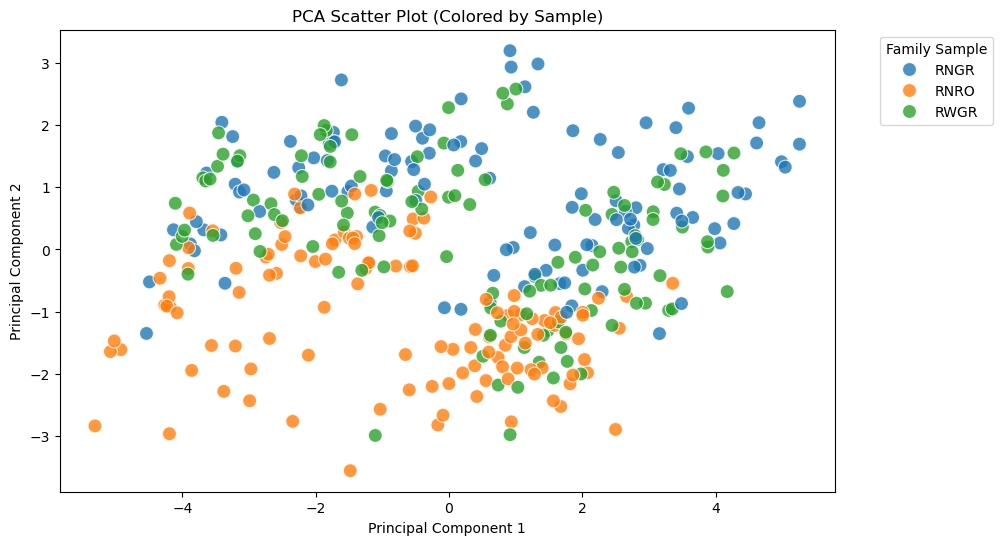

In [95]:
pc_2d, loadings = my_pca(merged_df, n_components=2)

#### <b> PCA - 3D </b>

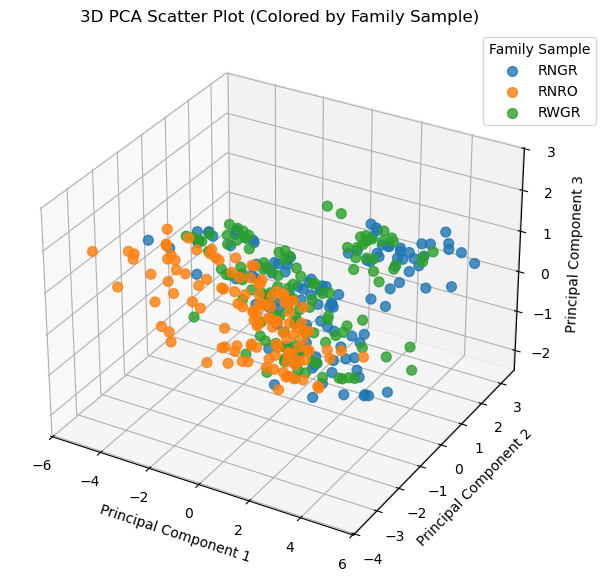

In [96]:
pc_3d, loadings_3d = my_pca(merged_df, n_components=3)

In [97]:
# DIFFERENT 3D PCA VISUALIZATION

# Extract numeric columns only
df_numeric = merged_df.select_dtypes(include=[np.number])

# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

# Apply PCA with 3 components
pca = PCA(n_components=3)
pca_3d = pca.fit_transform(df_scaled)

# Create DataFrame for PCA results
df_pca = pd.DataFrame(pca_3d, columns=["PC1", "PC2", "PC3"])

# Add Family Sample column
df_pca["Family Sample"] = merged_df["Sample"].str[:-2]

# Create color mapping based on Family Sample
unique_samples = df_pca["Family Sample"].unique()

# Use Plotly's qualitative color scale
tab10_colors = plt.cm.tab10.colors
#colors = px.colors.qualitative.Set3  # Good palette with distinct colors
color_dict = dict(zip(unique_samples, tab10_colors))

# Create Plotly 3D Scatter Plot
fig = go.Figure()

# Scatter plot for each unique Family Sample
for sample in unique_samples:
    subset = df_pca[df_pca["Family Sample"] == sample]
    fig.add_trace(go.Scatter3d(
        x=subset["PC1"], y=subset["PC2"], z=subset["PC3"],
        mode='markers',
        marker=dict(
            size=5,
            color=[color_dict[sample]] * len(subset),  # Assign color from the dictionary
            opacity=0.8
        ),
        name=sample
    ))

# Update layout with axis labels and title
fig.update_layout(
    title="3D PCA Scatter Plot (Colored by Family Sample)",
    scene=dict(
        xaxis_title="Principal Component 1",
        yaxis_title="Principal Component 2",
        zaxis_title="Principal Component 3"
    ),
    legend_title="Family Sample"
)

# Show the interactive plot
fig.show()


* SVM para splits
* KNN
* Separar por níves de Azoto

### <b> Models </b>

In [98]:
merged_df.drop(columns={'Date', 'Sample', 'Family Sample', 'timestamp', 'datetime'}, inplace=True) #Remove categorical and date columns

In [99]:
biometry_columns = ['No leaves', 'Diameter', 'Perpendicular', 'Height', 'Average Leaf Thickness'] # Target variables

In [100]:
merged_df

,No leaves,Diameter,Perpendicular,Height,Average Leaf Thickness,BBCH,GDD Cumul.,PAR Cumul.,Cumul. Irrigation (mL),Cumul. Nitrates (milimoles)
0,12,12.9,11.1,11.80,0.0000,19,317.050000,8284.7,350.0,2.1000
1,10,11.6,10.9,9.30,0.0000,19,317.050000,8284.7,350.0,2.1000
2,9,9.8,9.7,10.70,0.0000,19,317.050000,8284.7,350.0,2.1000
3,7,8.9,7.7,6.90,0.0000,17,317.050000,8284.7,350.0,2.1000
4,7,10.2,6.8,9.50,0.0000,17,317.050000,8284.7,350.0,2.1000
...,...,...,...,...,...,...,...,...,...,...
355,16,23.6,21.7,8.55,0.3520,39,809.244245,28775.3,1084.0,18.4280
356,12,28.6,27.4,13.75,0.3100,44,809.244245,28775.3,877.5,14.9175
357,16,23.6,23.8,8.55,0.3350,39,809.244245,28775.3,1045.5,17.7735
358,11,27.6,26.8,7.15,0.2975,45,809.244245,28775.3,1058.0,17.9860


<b> Simple Linear Regression Results </b>

In [101]:
linear,  results_linear = predict_biometry(merged_df, biometry_columns, model_type='linear')
pd.DataFrame(results_linear)

,Target Variable,MSE,MAE,R^2
0,No leaves,4.640982,1.753885,0.479415
1,Diameter,3.679306,1.529341,0.891305
2,Perpendicular,3.924328,1.496844,0.890411
3,Height,2.402545,1.268822,0.455377
4,Average Leaf Thickness,0.006195,0.060420,0.774398


<b> Ridge Results </b>

In [102]:
model_ridge, results_ridge = predict_biometry(merged_df, biometry_columns, model_type='ridge')
pd.DataFrame(results_ridge)

,Target Variable,MSE,MAE,R^2
0,No leaves,4.612762,1.748607,0.482580
1,Diameter,3.665809,1.527615,0.891704
2,Perpendicular,3.910187,1.496094,0.890805
3,Height,2.406307,1.271243,0.454524
4,Average Leaf Thickness,0.006103,0.060274,0.777755


<b> Lasso Results </b>

In [103]:
lasso, results_lasso = predict_biometry(merged_df, biometry_columns, model_type='lasso')
pd.DataFrame(results_lasso)


,Target Variable,MSE,MAE,R^2
0,No leaves,4.624492,1.749254,0.481264
1,Diameter,3.674407,1.530502,0.891450
2,Perpendicular,3.898198,1.491468,0.891140
3,Height,2.425296,1.279372,0.450219
4,Average Leaf Thickness,0.006084,0.061033,0.778467


<b> Random Forest Regressor </b>

In [104]:
rf, results_rf = predict_biometry(merged_df, biometry_columns, model_type='random_forest')
pd.DataFrame(results_rf)

,Target Variable,MSE,MAE,R^2
0,No leaves,3.573924,1.345139,0.599108
1,Diameter,4.186233,1.622861,0.876330
2,Perpendicular,4.386583,1.581194,0.877502
3,Height,2.393513,1.278514,0.457424
4,Average Leaf Thickness,0.002234,0.022020,0.918665


<b> XGBoost </b>

In [105]:
_, results_xg = predict_biometry(merged_df, biometry_columns, model_type='xgboost')
pd.DataFrame(results_xg)

,Target Variable,MSE,MAE,R^2
0,No leaves,3.696006,1.416161,0.585414
1,Diameter,5.026389,1.731987,0.851510
2,Perpendicular,5.206327,1.785695,0.854610
3,Height,3.000374,1.448288,0.319857
4,Average Leaf Thickness,0.002861,0.024696,0.895826


<b>  Need to experiment with a few other models </b>

#### <b> Experimenting with subsets of the final dataset (modified_df) </b>

In [106]:
modified_df

,Date,Number,Line,Sample,No leaves,Diameter,Perpendicular,Height,Average Leaf Thickness,BBCH,timestamp,datetime,GDD Cumul.,PAR Cumul.,Cumul. Irrigation (mL),Cumul. Nitrates (milimoles)
0,2024-09-07,19,3,RNGRA1,12,12.9,11.1,11.80,0.0000,19,05:03:13,2024-09-07 05:03:13,317.050000,8284.7,350.0,2.1000
1,2024-09-07,22,3,RNGRA2,10,11.6,10.9,9.30,0.0000,19,05:03:13,2024-09-07 05:03:13,317.050000,8284.7,350.0,2.1000
2,2024-09-07,16,3,RNGRA3,9,9.8,9.7,10.70,0.0000,19,05:03:13,2024-09-07 05:03:13,317.050000,8284.7,350.0,2.1000
3,2024-09-07,36,5,RNGRA4,7,8.9,7.7,6.90,0.0000,17,05:03:13,2024-09-07 05:03:13,317.050000,8284.7,350.0,2.1000
4,2024-09-07,32,5,RNGRA5,7,10.2,6.8,9.50,0.0000,17,05:03:13,2024-09-07 05:03:13,317.050000,8284.7,350.0,2.1000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,2024-10-03,3,1,RWGRC1,16,23.6,21.7,8.55,0.3520,39,15:03:13,2024-10-03 15:03:13,809.244245,28775.3,1084.0,18.4280
356,2024-10-03,9,2,RWGRC2,12,28.6,27.4,13.75,0.3100,44,15:03:13,2024-10-03 15:03:13,809.244245,28775.3,877.5,14.9175
357,2024-10-03,7,1,RWGRC3,16,23.6,23.8,8.55,0.3350,39,15:03:13,2024-10-03 15:03:13,809.244245,28775.3,1045.5,17.7735
358,2024-10-03,13,2,RWGRC4,11,27.6,26.8,7.15,0.2975,45,15:03:13,2024-10-03 15:03:13,809.244245,28775.3,1058.0,17.9860


<b> Irrigation 75 and G (green variety) </b>

In [107]:
seventy_five_g = modified_df[modified_df['Sample'].str.startswith('RNGR')].copy() 

<b> Irrigation 75 and R (red variety) </b>

In [108]:
seventy_five_r = modified_df[modified_df['Sample'].str.startswith('RNR')].copy() 

<b> Irrigation 50 and G (green variety)

In [109]:
fifty_g = modified_df[modified_df['Sample'].str.startswith('RW')].copy() 

In [110]:
fifty_g

,Date,Number,Line,Sample,No leaves,Diameter,Perpendicular,Height,Average Leaf Thickness,BBCH,timestamp,datetime,GDD Cumul.,PAR Cumul.,Cumul. Irrigation (mL),Cumul. Nitrates (milimoles)
30,2024-09-07,15,2,RWGRA1,12,12.4,10.8,11.60,0.0000,19,05:03:13,2024-09-07 05:03:13,317.050000,8284.7,350.0,2.1000
31,2024-09-07,4,1,RWGRA2,10,12.1,7.2,9.50,0.0000,19,05:03:13,2024-09-07 05:03:13,317.050000,8284.7,350.0,2.1000
32,2024-09-07,2,1,RWGRA3,10,10.9,9.7,9.80,0.0000,19,05:03:13,2024-09-07 05:03:13,317.050000,8284.7,350.0,2.1000
33,2024-09-07,6,1,RWGRA4,10,11.7,9.4,10.10,0.0000,19,05:03:13,2024-09-07 05:03:13,317.050000,8284.7,350.0,2.1000
34,2024-09-07,8,1,RWGRA5,10,11.3,10.8,7.80,0.0000,19,05:03:13,2024-09-07 05:03:13,317.050000,8284.7,350.0,2.1000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,2024-10-03,3,1,RWGRC1,16,23.6,21.7,8.55,0.3520,39,15:03:13,2024-10-03 15:03:13,809.244245,28775.3,1084.0,18.4280
356,2024-10-03,9,2,RWGRC2,12,28.6,27.4,13.75,0.3100,44,15:03:13,2024-10-03 15:03:13,809.244245,28775.3,877.5,14.9175
357,2024-10-03,7,1,RWGRC3,16,23.6,23.8,8.55,0.3350,39,15:03:13,2024-10-03 15:03:13,809.244245,28775.3,1045.5,17.7735
358,2024-10-03,13,2,RWGRC4,11,27.6,26.8,7.15,0.2975,45,15:03:13,2024-10-03 15:03:13,809.244245,28775.3,1058.0,17.9860


#### <b> 50 x 75 (Compare Irrigation within same species) </b>

In [111]:
g_dif_irr = pd.merge(seventy_five_g, fifty_g, how='outer')
g_dif_irr.sort_values(by='Date', inplace=True)
# Create a new column "Family Sample" by removing the last character of "Sample" for PCA
#g_dif_irr["Family Sample"] = g_dif_irr["Sample"].str[:-2]

In [112]:
g_dif_irr.columns

Index(['Date', 'Number', 'Line', 'Sample', 'No leaves', 'Diameter',
       'Perpendicular', 'Height', 'Average Leaf Thickness', 'BBCH',
       'timestamp', 'datetime', 'GDD Cumul.', 'PAR Cumul.',
       'Cumul. Irrigation (mL)', 'Cumul. Nitrates (milimoles)'],
      dtype='object')

<b> Change Sample name </b>

In [113]:
g_dif_irr.loc[g_dif_irr['Sample'].str.startswith('RNGR'), 'Sample'] = g_dif_irr['Sample'].str.replace('RNGR', '75G', regex=True)
g_dif_irr.loc[g_dif_irr['Sample'].str.startswith('RWGR'), 'Sample'] = g_dif_irr['Sample'].str.replace('RWGR', '50G', regex=True)



In [114]:
g_dif_irr

,Date,Number,Line,Sample,No leaves,Diameter,Perpendicular,Height,Average Leaf Thickness,BBCH,timestamp,datetime,GDD Cumul.,PAR Cumul.,Cumul. Irrigation (mL),Cumul. Nitrates (milimoles)
0,2024-09-07,1,1,50GB5,10,14.5,10.4,9.50,0.0000,19,05:03:13,2024-09-07 05:03:13,317.050000,8284.7,350.00,4.55000
29,2024-09-07,37,5,75GC2,11,15.4,12.2,12.50,0.0000,19,05:03:13,2024-09-07 05:03:13,317.050000,8284.7,350.00,5.95000
28,2024-09-07,36,5,75GA4,7,8.9,7.7,6.90,0.0000,17,05:03:13,2024-09-07 05:03:13,317.050000,8284.7,350.00,2.10000
27,2024-09-07,35,5,75GB4,10,11.3,9.8,10.40,0.0000,19,05:03:13,2024-09-07 05:03:13,317.050000,8284.7,350.00,4.55000
26,2024-09-07,34,5,75GC3,12,13.8,12.6,10.90,0.0000,19,05:03:13,2024-09-07 05:03:13,317.050000,8284.7,350.00,5.95000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,2024-10-03,2,1,50GA3,14,23.5,24.2,11.15,0.2975,19,15:03:13,2024-10-03 15:03:13,809.244245,28775.3,990.50,5.94300
210,2024-10-03,1,1,50GB5,16,28.5,26.4,11.55,0.2300,44,15:03:13,2024-10-03 15:03:13,809.244245,28775.3,1131.50,14.70950
238,2024-10-03,36,5,75GA4,13,25.6,33.4,12.95,0.2550,19,15:03:13,2024-10-03 15:03:13,809.244245,28775.3,966.25,5.79750
223,2024-10-03,14,2,50GB2,10,22.4,21.5,7.05,0.2675,19,15:03:13,2024-10-03 15:03:13,809.244245,28775.3,800.50,10.40650


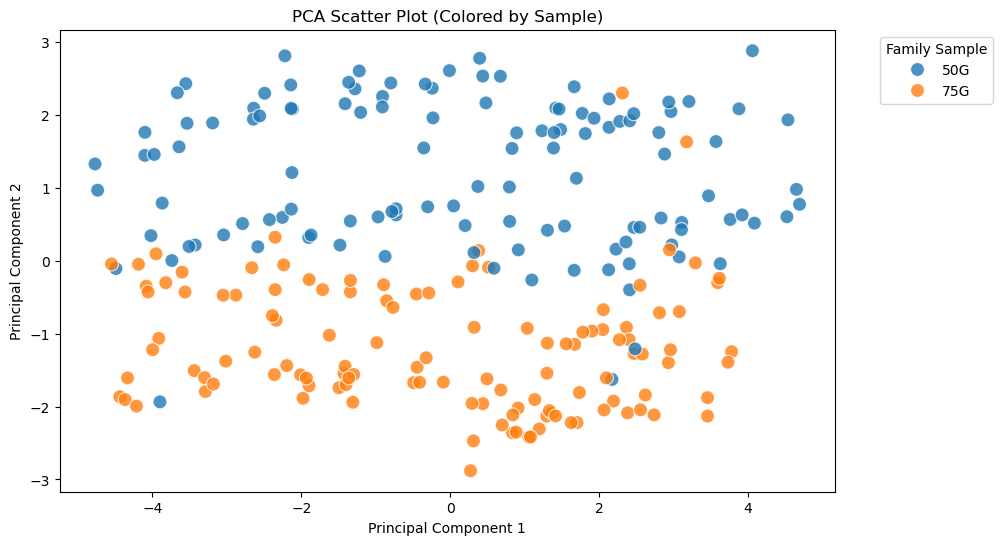

In [115]:
irr_pc_2d, irr_loadings_2d = my_pca(g_dif_irr, n_components=2)

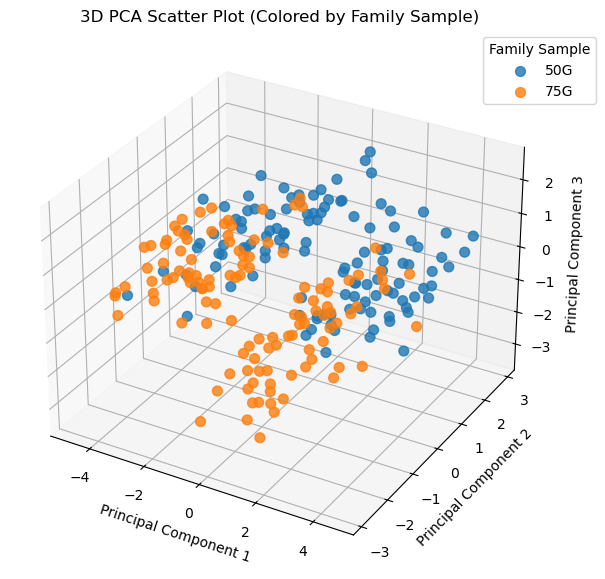

In [116]:
irr_pc_3d, irr_loadings_3d = my_pca(g_dif_irr, n_components=3)

In [117]:
g_dif_irr.drop(columns={'Date', 'Sample', 'timestamp', 'datetime'}, inplace=True) #Remove categorical and date columns

In [118]:
g_dif_irr

,Number,Line,No leaves,Diameter,Perpendicular,Height,Average Leaf Thickness,BBCH,GDD Cumul.,PAR Cumul.,Cumul. Irrigation (mL),Cumul. Nitrates (milimoles)
0,1,1,10,14.5,10.4,9.50,0.0000,19,317.050000,8284.7,350.00,4.55000
29,37,5,11,15.4,12.2,12.50,0.0000,19,317.050000,8284.7,350.00,5.95000
28,36,5,7,8.9,7.7,6.90,0.0000,17,317.050000,8284.7,350.00,2.10000
27,35,5,10,11.3,9.8,10.40,0.0000,19,317.050000,8284.7,350.00,4.55000
26,34,5,12,13.8,12.6,10.90,0.0000,19,317.050000,8284.7,350.00,5.95000
...,...,...,...,...,...,...,...,...,...,...,...,...
211,2,1,14,23.5,24.2,11.15,0.2975,19,809.244245,28775.3,990.50,5.94300
210,1,1,16,28.5,26.4,11.55,0.2300,44,809.244245,28775.3,1131.50,14.70950
238,36,5,13,25.6,33.4,12.95,0.2550,19,809.244245,28775.3,966.25,5.79750
223,14,2,10,22.4,21.5,7.05,0.2675,19,809.244245,28775.3,800.50,10.40650


In [119]:
_,  results_linear_irr = predict_biometry(g_dif_irr, biometry_columns, model_type='linear')
pd.DataFrame(results_linear_irr)

,Target Variable,MSE,MAE,R^2
0,No leaves,4.309135,1.672157,0.412252
1,Diameter,4.353439,1.640318,0.868115
2,Perpendicular,7.140063,1.861414,0.825100
3,Height,2.665295,1.227628,0.322550
4,Average Leaf Thickness,0.005926,0.060444,0.735699


In [120]:
_, irr_results_ridge = predict_biometry(g_dif_irr, biometry_columns, model_type='ridge')
pd.DataFrame(irr_results_ridge)

,Target Variable,MSE,MAE,R^2
0,No leaves,4.289542,1.669615,0.414924
1,Diameter,4.356071,1.639092,0.868035
2,Perpendicular,7.098433,1.855812,0.826120
3,Height,2.696606,1.248278,0.314592
4,Average Leaf Thickness,0.005993,0.060728,0.732669


In [121]:
_, irr_results_lasso = predict_biometry(g_dif_irr, biometry_columns, model_type='lasso')
pd.DataFrame(irr_results_lasso)

,Target Variable,MSE,MAE,R^2
0,No leaves,4.308647,1.672500,0.412318
1,Diameter,4.431477,1.636866,0.865751
2,Perpendicular,7.116996,1.851442,0.825665
3,Height,2.693262,1.256220,0.315441
4,Average Leaf Thickness,0.005492,0.056886,0.755034


In [122]:
_, irr_results_rf = predict_biometry(g_dif_irr, biometry_columns, model_type='random_forest')
pd.DataFrame(irr_results_rf)

,Target Variable,MSE,MAE,R^2
0,No leaves,3.179202,1.391458,0.566370
1,Diameter,4.201687,1.661354,0.872712
2,Perpendicular,7.441785,1.900042,0.817709
3,Height,3.031329,1.314469,0.229514
4,Average Leaf Thickness,0.002930,0.020777,0.869326


In [123]:
_, irr_results_xg = predict_biometry(g_dif_irr, biometry_columns, model_type='xgboost')
pd.DataFrame(irr_results_xg)

,Target Variable,MSE,MAE,R^2
0,No leaves,3.016611,1.312820,0.588547
1,Diameter,4.822971,1.796047,0.853891
2,Perpendicular,8.000787,2.124452,0.804016
3,Height,3.120100,1.340064,0.206950
4,Average Leaf Thickness,0.003341,0.027717,0.850960


#### <b> R x G (Compare different species with the same irrigation) </b>

In [124]:
r_g_species = pd.merge(seventy_five_g, seventy_five_r, how='outer')
r_g_species.sort_values(by='Date', inplace=True)
# Create a new column "Family Sample" by removing the last character of "Sample" for PCA
#r_g_species["Family Sample"] = r_g_species["Sample"].str[:-2]

In [125]:
r_g_species.loc[r_g_species['Sample'].str.startswith('RNGR'), 'Sample'] = r_g_species['Sample'].str.replace('RNGR', '75G', regex=True)
r_g_species.loc[r_g_species['Sample'].str.startswith('RNRO'), 'Sample'] = r_g_species['Sample'].str.replace('RNRO', '75R', regex=True)

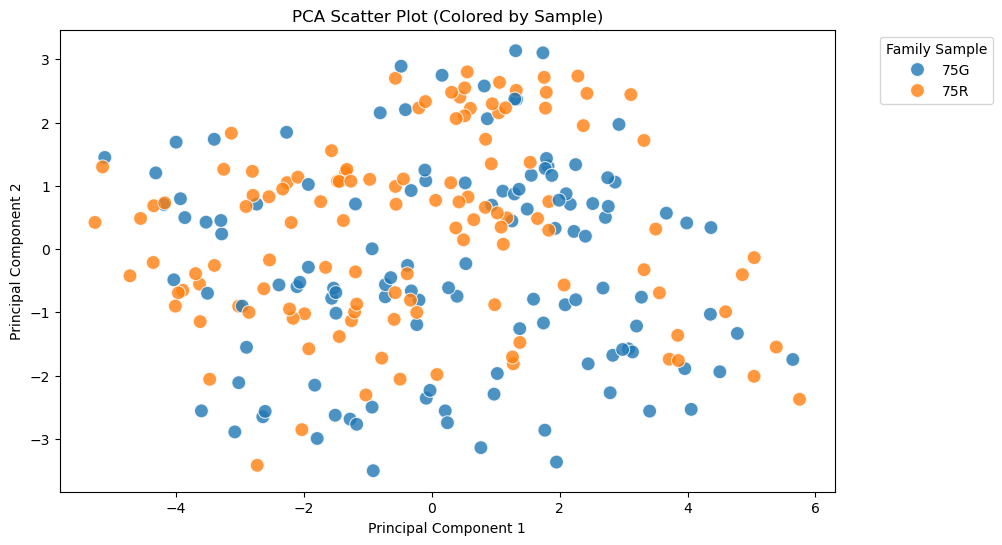

In [126]:
species_pc_2d, species_loadings_2d = my_pca(r_g_species, n_components=2)

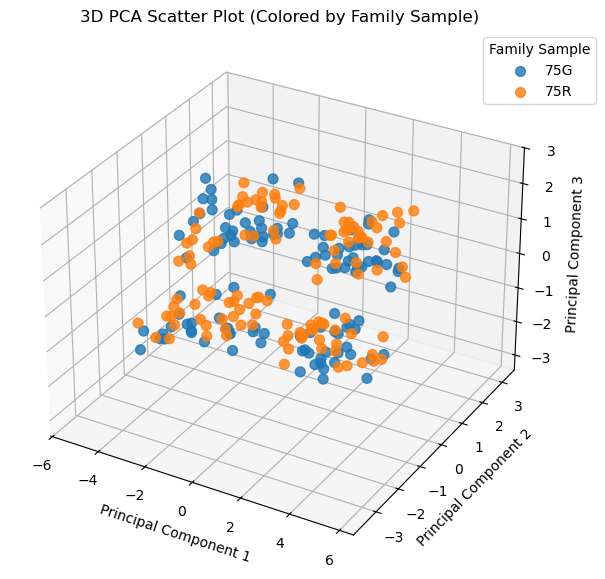

In [127]:
species_pc_3d, species_loadings_3d = my_pca(r_g_species, n_components=3)

In [128]:
r_g_species.drop(columns={'Date', 'Sample', 'timestamp', 'datetime'}, inplace=True) #Remove categorical and date columns

In [129]:
_,  species_results_linear = predict_biometry(r_g_species, biometry_columns, model_type='linear')
pd.DataFrame(species_results_linear)

,Target Variable,MSE,MAE,R^2
0,No leaves,3.732712,1.573276,0.644504
1,Diameter,4.348453,1.610193,0.891737
2,Perpendicular,4.163292,1.409472,0.900060
3,Height,1.462549,0.920509,0.585552
4,Average Leaf Thickness,0.006777,0.062231,0.750643


In [130]:
_,  species_results_ridge = predict_biometry(r_g_species, biometry_columns, model_type='ridge')
pd.DataFrame(species_results_ridge)

,Target Variable,MSE,MAE,R^2
0,No leaves,3.756332,1.580604,0.642254
1,Diameter,4.331884,1.610711,0.892149
2,Perpendicular,4.122672,1.400495,0.901035
3,Height,1.453856,0.919971,0.588015
4,Average Leaf Thickness,0.006801,0.062914,0.749754


In [131]:
_,  species_results_lasso = predict_biometry(r_g_species, biometry_columns, model_type='lasso')
pd.DataFrame(species_results_lasso)

,Target Variable,MSE,MAE,R^2
0,No leaves,3.754005,1.578417,0.642476
1,Diameter,4.324385,1.611641,0.892336
2,Perpendicular,4.063685,1.393345,0.902451
3,Height,1.448876,0.920631,0.589426
4,Average Leaf Thickness,0.007251,0.069741,0.733192


In [132]:
_,  species_results_rf = predict_biometry(r_g_species, biometry_columns, model_type='random_forest')
pd.DataFrame(species_results_rf)

,Target Variable,MSE,MAE,R^2
0,No leaves,1.650733,0.873750,0.842787
1,Diameter,4.469164,1.606562,0.888732
2,Perpendicular,4.693702,1.600562,0.887327
3,Height,1.505573,0.933083,0.573360
4,Average Leaf Thickness,0.001457,0.021559,0.946377


In [133]:
_, species_results_xg = predict_biometry(r_g_species, biometry_columns, 'xgboost')
pd.DataFrame(species_results_xg)

,Target Variable,MSE,MAE,R^2
0,No leaves,1.541928,0.742450,0.853150
1,Diameter,5.270926,1.743129,0.868770
2,Perpendicular,5.044510,1.654965,0.878906
3,Height,1.707084,1.027317,0.516257
4,Average Leaf Thickness,0.002398,0.025888,0.911754


* <b> Documentação dos resultados </b>
* <b> Overfitting e Underfitting </b>
* <b> Hyper-parameter tuning </b>
* <b> Testar com redes neuronais </b>